In [1]:
# realizando inferencias
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

2025-05-18 15:23:07.546919: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747599787.557206  334010 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747599787.560296  334010 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747599787.568833  334010 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747599787.568843  334010 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747599787.568844  334010 computation_placer.cc:177] computation placer alr

I0000 00:00:1747599797.029971  334010 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1284 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Ti, pci bus id: 0000:0b:00.0, compute capability: 8.9
2025-05-18 15:23:17.717574: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 75759616 exceeds 10% of free system memory.
2025-05-18 15:23:17.798276: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 75759616 exceeds 10% of free system memory.
2025-05-18 15:23:17.870488: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 75759616 exceeds 10% of free system memory.
2025-05-18 15:23:18.208213: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:387] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608
I0000 00:00:1747599798.430873  334946 service.cc:152] XLA service 0x7ea288004b60 initialized for platform CUDA (this do

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step


I0000 00:00:1747599798.957364  334946 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


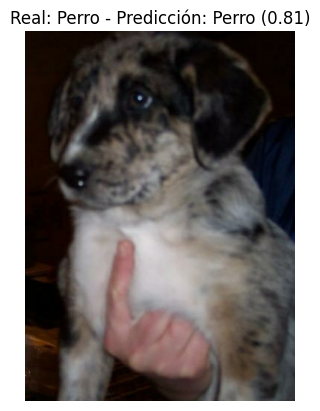

In [2]:
# --- Cargar modelo guardado ---
model = tf.keras.models.load_model('modelo_perros_gatos.keras')

# --- Cargar y mezclar dataset ---
ds, info = tfds.load('cats_vs_dogs', split='train', as_supervised=True, with_info=True)
ds = ds.shuffle(buffer_size=1000)

# --- Tomar una imagen aleatoria
sample_image, label = next(iter(ds))

# --- Preprocesar imagen como en entrenamiento ---
IMG_SIZE = 150
image_resized = tf.image.resize(sample_image, (IMG_SIZE, IMG_SIZE))
image_normalized = tf.cast(image_resized, tf.float32) / 255.0
image_input = tf.expand_dims(image_normalized, axis=0)

# --- Realizar inferencia ---
prediction = model.predict(image_input)[0][0]
predicted_label = 'Perro' if prediction > 0.5 else 'Gato'
true_label = 'Perro' if label == 1 else 'Gato'

# --- Mostrar imagen e impresión de los resultados
plt.imshow(sample_image)
plt.axis('off')
plt.title(f'Real: {true_label} - Predicción: {predicted_label} ({prediction:.2f})')
plt.show()